In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_parquet(path="../../../workspaces/data/green_tripdata_2021-01.parquet")

In [25]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


In [26]:
data.lpep_dropoff_datetime = pd.to_datetime(data.lpep_dropoff_datetime)
data.lpep_pickup_datetime = pd.to_datetime(data.lpep_pickup_datetime)
data["duration"] = (data.lpep_dropoff_datetime - data.lpep_pickup_datetime)
data.duration = data.duration.apply(lambda d: d.seconds / 60)

In [32]:
data.duration.describe(percentiles=[0.5, 0.75, 0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
75%         23.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [33]:
data_subset = data[(data.duration >= 1) & (data.duration <= 68)]
data_subset.shape[0]/data.shape[0]

0.9714707650487467

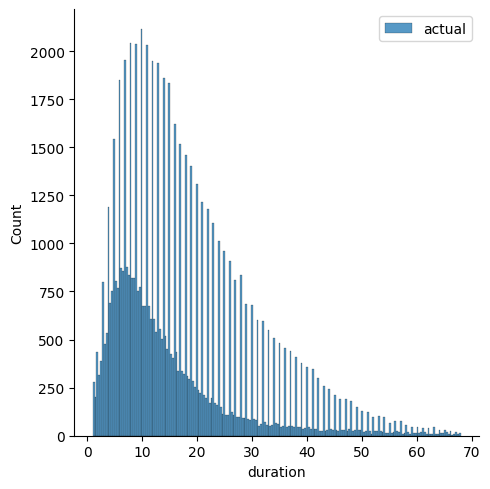

In [39]:
sns.displot(data_subset.duration, label="actual", bins=200)
plt.legend()